<a href="https://colab.research.google.com/github/tarikul12/cvpr/blob/main/background_manyimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.4 MB/s eta 0:00:00


In [3]:
pip install ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00


In [4]:
pip install ipython

In [5]:
import os
import requests
from PIL import Image
from io import BytesIO
from rembg import remove
import ipywidgets as widgets
from IPython.display import display

In [ ]:
def process_image(img, background_img):
    # Remove background using rembg
    with BytesIO() as f:
        img.save(f, format='PNG')
        f.seek(0)
        input_data = f.read()
        # Perform background removal
        subject = remove(input_data, alpha_matting=True, alpha_matting_foreground_threshold=50)

    # Save the masked image to a BytesIO object
    with BytesIO(subject) as f:
        # Open and resize the background image to match the size of the foreground image
        background_img = background_img.resize(img.size)

        # Open the masked image
        foreground_img = Image.open(f)

        # Paste the foreground image onto the background image
        background_img.paste(foreground_img, (0, 0), foreground_img)

        return background_img

# Create file upload widgets
img_upload = widgets.FileUpload(description='Upload Image')
background_upload = widgets.FileUpload(description='Upload Background')

display(img_upload, background_upload)

# Define a callback function to process the uploaded images
def process_upload(change):
    img_content = img_upload.data[-1]
    background_content = background_upload.data[-1]

    if img_content is None or background_content is None:
        print("Please upload both an image and a background image.")
        return

    img = Image.open(BytesIO(img_content))
    background_img = Image.open(BytesIO(background_content))

    # Process the image and display the output
    output_img = process_image(img, background_img)
    display(output_img)

# Attach the callback function to the file upload widgets
img_upload.observe(process_upload, names='data')
background_upload.observe(process_upload, names='data')

FileUpload(value={}, description='Upload Image')

FileUpload(value={}, description='Upload Background')

FileUpload(value={}, description='Upload Image')

FileUpload(value={}, description='Upload Background')

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 62.6GB/s]


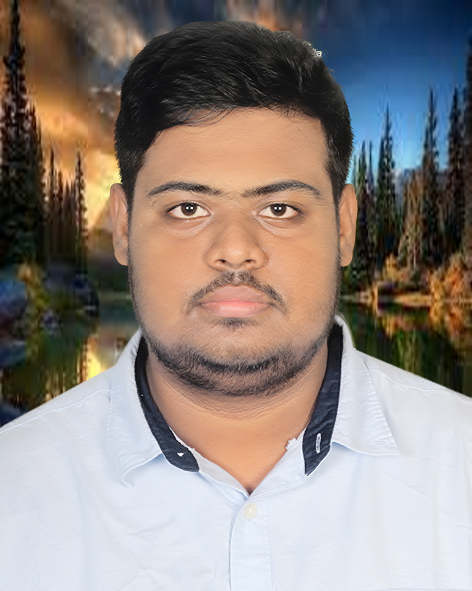

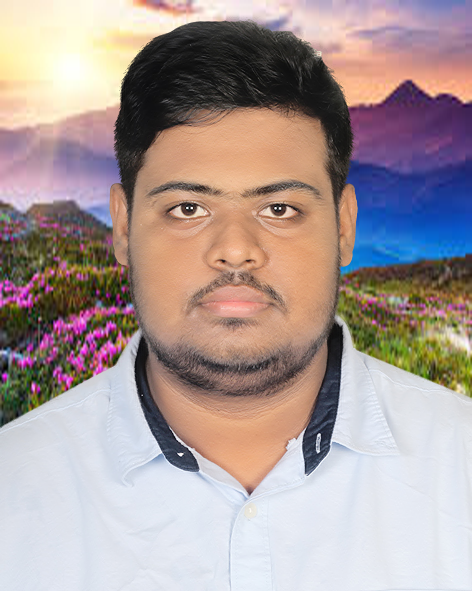

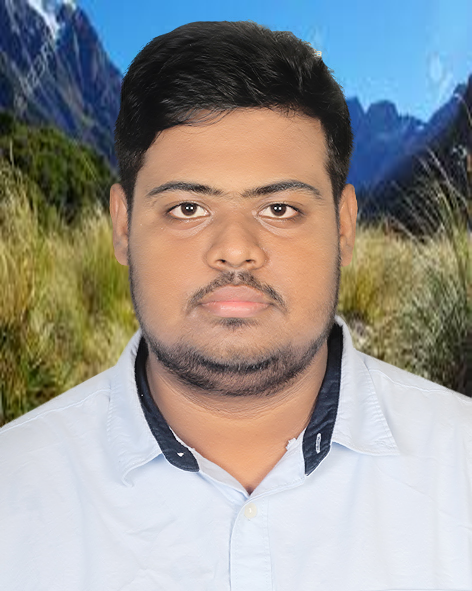

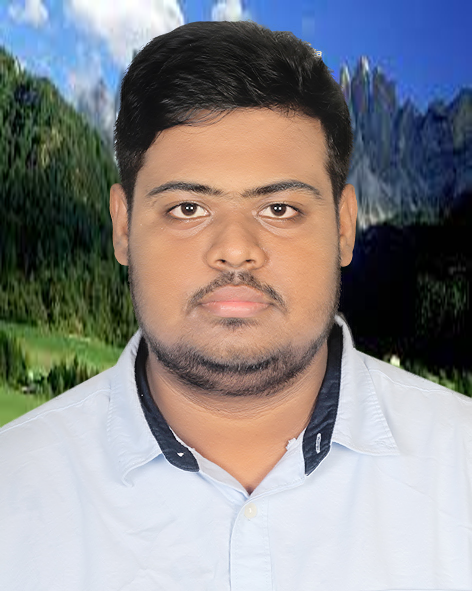

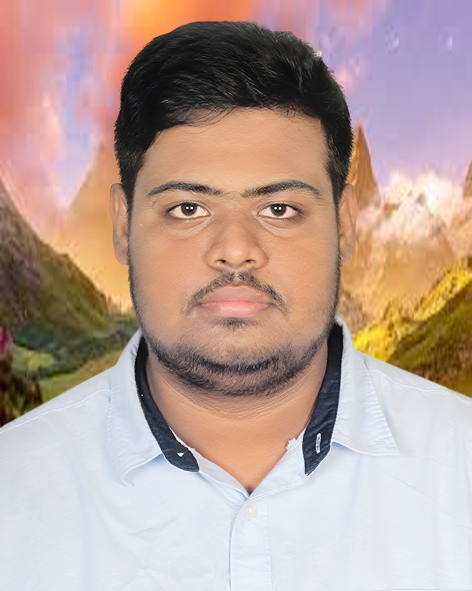

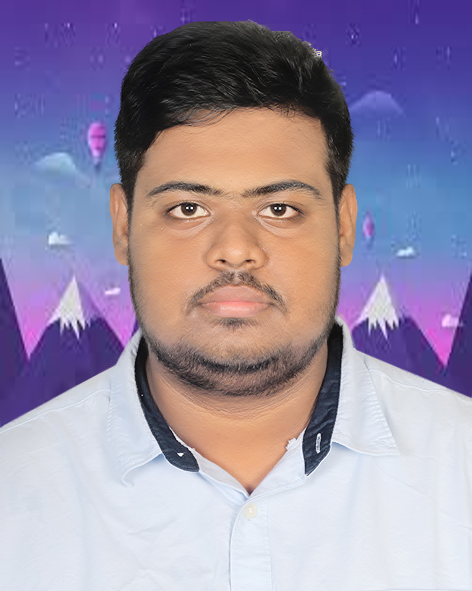

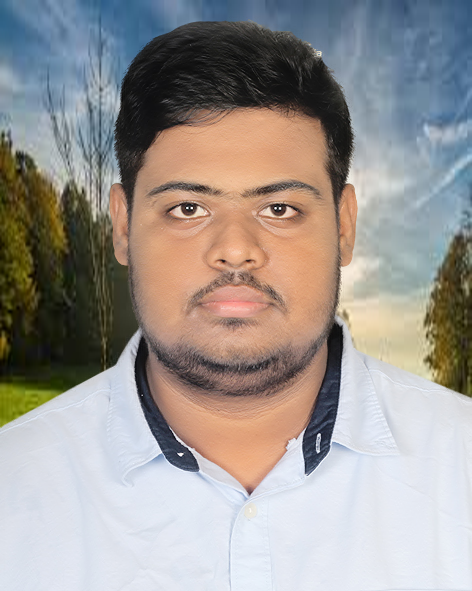

In [6]:
def process_image(img, background_img):
    # Remove background using rembg
    with BytesIO() as f:
        img.save(f, format='PNG')
        f.seek(0)
        input_data = f.read()
        # Perform background removal
        subject = remove(input_data, alpha_matting=True, alpha_matting_foreground_threshold=50)

    # Save the masked image to a BytesIO object
    with BytesIO(subject) as f:
        # Open and resize the background image to match the size of the foreground image
        background_img = background_img.resize(img.size)

        # Open the masked image
        foreground_img = Image.open(f)

        # Paste the foreground image onto the background image
        background_img.paste(foreground_img, (0, 0), foreground_img)

        return background_img

# Create file upload widgets
img_upload = widgets.FileUpload(description='Upload Image')
background_upload = widgets.FileUpload(description='Upload Background')

display(img_upload, background_upload)

# Define a callback function to process the uploaded background image
def process_background_upload(change):
    img_content = img_upload.data[-1]
    background_content = background_upload.data[-1]

    if img_content is None or background_content is None:
        print("Please upload both an image and a background image.")
        return

    img = Image.open(BytesIO(img_content))
    background_img = Image.open(BytesIO(background_content))

    # Process the image and display the output
    output_img = process_image(img, background_img)
    display(output_img)

# Attach the callback function to the background upload widget
background_upload.observe(process_background_upload, names='data')